In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
targetData = pd.read_csv("../../../stdcode6/dataset/feature_regression_example.csv")

In [3]:
targetData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155


In [4]:
ynLabelEn = LabelEncoder()

In [5]:
targetData["HO_YN"] = ynLabelEn.fit_transform(targetData["HOLIDAY"])
targetData["PRO_YN"] = ynLabelEn.fit_transform(targetData["PROMOTION"])

In [6]:
targetData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1


In [7]:
corrData = targetData.corr()

In [8]:
corrData

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HO_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PRO_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [9]:
targetStd = 0.5

In [10]:
features = list(corrData[(abs(corrData.QTY) > targetStd) & \
                         (abs(corrData.QTY) != 1)].index)

In [11]:
features

['HCLUS', 'PRO_PERCENT', 'HO_YN', 'PRO_YN']

In [12]:
label = ["QTY"]

In [13]:
sortKey = ["YEARWEEK"]

In [14]:
targetData = targetData.sort_values(sortKey).reset_index(drop=True, inplace = False)

In [15]:
featuresData = targetData[features]

In [16]:
labelData = targetData[label]

In [17]:
trData, tdData = train_test_split(featuresData, test_size=0.2, random_state= 10)

In [18]:
trLabel, tdLabel = train_test_split(labelData, test_size = 0.2, random_state = 10)

In [19]:
trData = trData.reset_index(drop=True, inplace = False)
tdData = tdData.reset_index(drop=True, inplace = False)
trLabel = trLabel.reset_index(drop=True, inplace = False)
tdLabel = tdLabel.reset_index(drop=True, inplace = False)

In [20]:
model_method = tree.DecisionTreeRegressor()

In [21]:
model = model_method.fit(trData, trLabel)

In [27]:
from sklearn.tree import plot_tree

[Text(0.42410714285714285, 0.9166666666666666, 'X[1] <= 0.259\nsquared_error = 555633.453\nsamples = 84\nvalue = 1156.393'),
 Text(0.19642857142857142, 0.75, 'X[1] <= 0.104\nsquared_error = 275478.829\nsamples = 53\nvalue = 785.962'),
 Text(0.07142857142857142, 0.5833333333333334, 'X[2] <= 0.5\nsquared_error = 79692.408\nsamples = 21\nvalue = 345.143'),
 Text(0.03571428571428571, 0.4166666666666667, 'squared_error = 82024.05\nsamples = 19\nvalue = 362.947'),
 Text(0.10714285714285714, 0.4166666666666667, 'X[0] <= 1.5\nsquared_error = 25921.0\nsamples = 2\nvalue = 176.0'),
 Text(0.07142857142857142, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 337.0'),
 Text(0.14285714285714285, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 15.0'),
 Text(0.32142857142857145, 0.5833333333333334, 'X[0] <= 2.5\nsquared_error = 192752.625\nsamples = 32\nvalue = 1075.25'),
 Text(0.25, 0.4166666666666667, 'X[1] <= 0.209\nsquared_error = 106505.778\nsamples = 9\nvalue = 1397.0'),
 Text(0.214285714285714

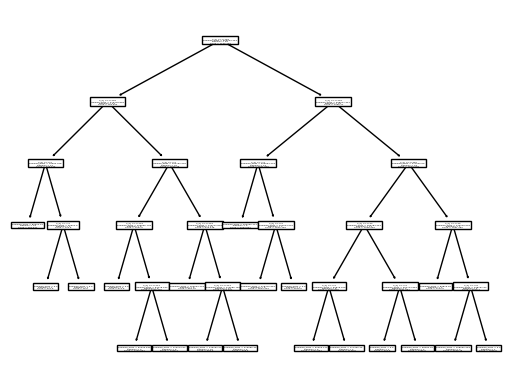

In [28]:
plot_tree(model)

In [29]:
import matplotlib.pyplot as plt

[Text(0.42410714285714285, 0.9166666666666666, 'X[1] <= 0.259\nsquared_error = 555633.453\nsamples = 84\nvalue = 1156.393'),
 Text(0.19642857142857142, 0.75, 'X[1] <= 0.104\nsquared_error = 275478.829\nsamples = 53\nvalue = 785.962'),
 Text(0.07142857142857142, 0.5833333333333334, 'X[2] <= 0.5\nsquared_error = 79692.408\nsamples = 21\nvalue = 345.143'),
 Text(0.03571428571428571, 0.4166666666666667, 'squared_error = 82024.05\nsamples = 19\nvalue = 362.947'),
 Text(0.10714285714285714, 0.4166666666666667, 'X[0] <= 1.5\nsquared_error = 25921.0\nsamples = 2\nvalue = 176.0'),
 Text(0.07142857142857142, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 337.0'),
 Text(0.14285714285714285, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 15.0'),
 Text(0.32142857142857145, 0.5833333333333334, 'X[0] <= 2.5\nsquared_error = 192752.625\nsamples = 32\nvalue = 1075.25'),
 Text(0.25, 0.4166666666666667, 'X[1] <= 0.209\nsquared_error = 106505.778\nsamples = 9\nvalue = 1397.0'),
 Text(0.214285714285714

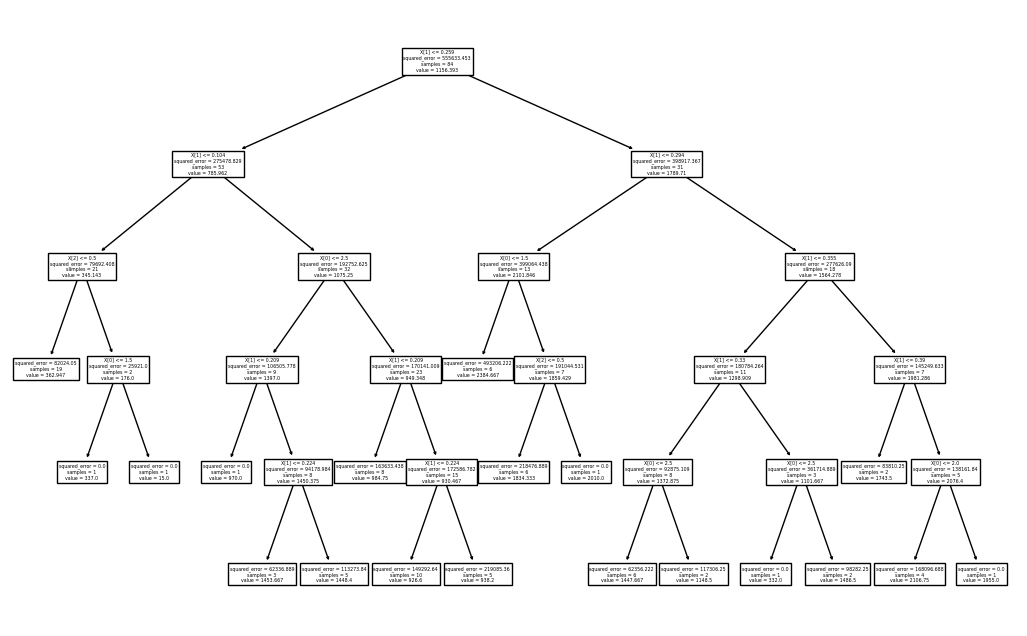

In [30]:
plt.figure(figsize=(13,8))
plot_tree(model)

In [22]:
predictData = model.predict(tdData)

In [23]:
predictDf = pd.DataFrame(predictData, columns = {"PREDICTED"}).reset_index(drop=True, inplace = False)

In [24]:
finalDf = pd.concat([tdLabel, predictDf], axis=1)

In [25]:
finalDf

,QTY,PREDICTED
0,43,362.947368
1,2069,1448.400000
2,1758,1743.500000
3,3691,1743.500000
4,2240,1834.333333
5,572,926.600000
6,1504,938.200000
7,1616,1447.666667
8,1810,970.000000
9,862,1453.666667


In [26]:
model_method.score(tdData, tdLabel)

0.5651271729943226